## O seguinte *script* é utilizado para criar um *dataset* completo e gerar os gráficos de análise de qualidade de voz **(MOS)** e taxa de erros de *bit* **(BER)**

###  Concatena todos os *datasets* dentro da pasta

In [22]:
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
%matplotlib inline
import os
import platform
import pandas as pd
import platform
import seaborn as sns
import re

# Identifica sistema operacional

system_os = platform.system()

if system_os == 'Linux':
    path_delim = '/'
if system_os == 'Windows':
    path_delim = '\\'

path = input(r'Diretório que contem os dados:')
file_name = path.split(path_delim)[-1]
files = os.listdir(path)

df_list = []
count = 0

for txt in files:
    if txt.endswith('.txt'):

        # Lê data set e adiciona cabecalho

        df = pd.read_csv(path + path_delim + txt, index_col=None, delimiter=',', 
                  names=["SNR", "MOS", "BER"])
    
        # Adiciona coluna com tipo de codificação de 
        # canal em cada data set

        idx_len = len(df.index)
        code = re.search("\(.*?\)", txt)
        if code != None:
            code = code.group(0)
            code = ['RS ' + code.replace('-', ', ')] * idx_len
        else:
            code = ['No Code'] * idx_len
        df['FEC'] = code
    
        # Concatena todos data sets 

        df_list.append(df)
df_list = pd.concat(df_list)
df_list

Diretório que contem os dados:C:\Users\leofb\Google Drive\Resultados Finais\256-QAM


,SNR,MOS,BER,FEC
0,20.0,0.97400,0.063906,No Code
1,20.1,1.03830,0.062676,No Code
2,20.2,0.99168,0.061389,No Code
3,20.3,1.11220,0.060084,No Code
4,20.4,1.02870,0.058803,No Code
5,20.5,0.97320,0.057566,No Code
6,20.6,0.89700,0.056275,No Code
7,20.7,0.96493,0.054998,No Code
8,20.8,1.05050,0.053773,No Code
9,20.9,0.89117,0.052591,No Code


### Salva *dataset* em formato CSV

In [30]:
try:
    df_list.to_csv(path + path_delim + file_name + '_dataset.csv')
except Exception as ex:
    print(ex)

###  Exibe *dataset* completo

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_list)

      SNR      MOS           BER            FEC
0    20.0  0.97400  6.390600e-02        No Code
1    20.1  1.03830  6.267600e-02        No Code
2    20.2  0.99168  6.138900e-02        No Code
3    20.3  1.11220  6.008400e-02        No Code
4    20.4  1.02870  5.880300e-02        No Code
5    20.5  0.97320  5.756600e-02        No Code
6    20.6  0.89700  5.627500e-02        No Code
7    20.7  0.96493  5.499800e-02        No Code
8    20.8  1.05050  5.377300e-02        No Code
9    20.9  0.89117  5.259100e-02        No Code
10   21.0  0.88862  5.129400e-02        No Code
11   21.1  0.95342  5.007400e-02        No Code
12   21.2  0.87237  4.887500e-02        No Code
13   21.3  0.96417  4.766500e-02        No Code
14   21.4  0.93000  4.645600e-02        No Code
15   21.5  0.87183  4.527600e-02        No Code
16   21.6  0.85450  4.406000e-02        No Code
17   21.7  0.92313  4.287900e-02        No Code
18   21.8  0.90815  4.170300e-02        No Code
19   21.9  0.80543  4.059100e-02        

###  Cria e exibe gráfico do índice de qualidade (MOS)
> Os eixos *x* e *y* devem ser configurados para uma melhor visualização dos dados

Text(0, 0.5, 'PESQ (MOS)')

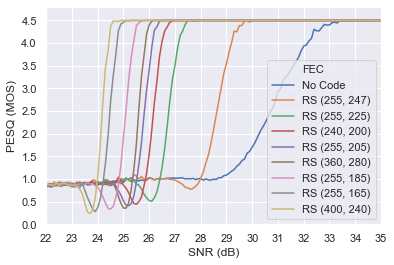

In [29]:
sns.set(style="darkgrid")

# Paletas de cores utilizadas
# nipy_spectral_r, Set1, None

ax = sns.lineplot(x="SNR", y="MOS", hue='FEC', sort=True, data=df_list, palette=None, color='magenta')

# Define os limites dos eixos x e y

plt.ylim(0, 4.8)
plt.xlim(22, 35)

# Configura ticks dos eixos x e y

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Configura e remove Label da legenda

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:], frameon=True, loc='lower center', ncol=3)

# Remove xtick labels

# ax.set(xticklabels=[])

# Label eixo X e Y

ax.set_xlabel('SNR (dB)', fontsize=12)
ax.set_ylabel('PESQ (MOS)', fontsize=12)


###  Salva gráfico em formato SVG

In [31]:
fig = ax.get_figure()
try:
    fig.savefig(path + path_delim + file_name + '_mos_lineplot.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)

###  Cria e exibe gráfico da análise de BER
> Os eixos *x* e *y* devem ser configurados para uma melhor visualização dos dados

Text(0.5, 0, 'SNR (dB)')

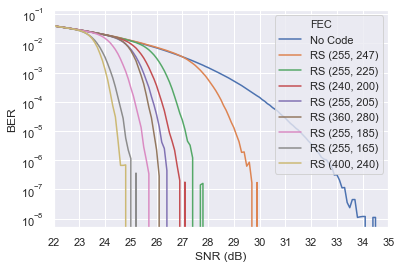

In [27]:
sns.set(style="darkgrid")
ax = sns.lineplot(x="SNR", y="BER", hue="FEC", data=df_list)

# Define o limite dos eixo x

plt.xlim(22, 35)
plt.ylim()

# Utiliza escala logarítmica para eixo y

ax.set_yscale('log')

# Configura ticks do eixo x

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Label eixo X

ax.set_xlabel('SNR (dB)', fontsize=12)

###  Salva gráfico em formato SVG

In [32]:
fig = ax.get_figure()
try:
    fig.savefig(path + path_delim + file_name + '_ber_lineplot.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)